# Van Krevelen Diagrams Plots

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
%matplotlib inline

# FTICR-MS DATA FILE

In [2]:
WC_EXT_t0_composite = pd.read_excel("WC_EXT_t0_composite.xlsx")
WC_EXT_t0_S = pd.read_excel("WC_EXT_t0_S.xlsx")
WC_EXT_t0_M = pd.read_excel("WC_EXT_t0_M.xlsx")
WC_EXT_t0_L = pd.read_excel("WC_EXT_t0_L.xlsx")

WC_EXT_OX_t1_composite = pd.read_excel("WC_EXT_OX_t1_composite.xlsx")
WC_EXT_OX_t1_S = pd.read_excel("WC_EXT_OX_t1_S.xlsx")
WC_EXT_OX_t1_M = pd.read_excel("WC_EXT_OX_t1_M.xlsx")
WC_EXT_OX_t1_L = pd.read_excel("WC_EXT_OX_t1_L.xlsx")

# Create list of Dataframes and Sample Names

In [3]:
df = [WC_EXT_t0_S,WC_EXT_t0_M, WC_EXT_t0_L,WC_EXT_t0_composite]
sample_names = ['WC t0-Small','WC t0-Medium','WC t0-Large','WC t0-composite']
#df = [WC_EXT_OX_t1_S,WC_EXT_OX_t1_M, WC_EXT_OX_t1_L,WC_EXT_OX_t1_composite]
#sample_names = ['WC_t1-Small','WC_t1-Medium','WC_t1-Large','WC_EXT_OX_t1_composite']

# Using colors assigned on https://msc-viz.emsl.pnnl.gov/fticr.html

In [4]:
cdic = {'AminoSugar' : 'blue',
        'Carb' : 'tab:orange',
        'ConHC' : 'green',
        'Lignin': 'tab:red',
        'Lipid' : 'magenta',
        'Other' : 'tab:brown',
        'Protein' : 'tab:pink',
        'Tannin' : 'tab:gray',
        'UnsatHC' : 'yellow',
         'None' : 'white'}

# Mapping Classes to Colors 

In [5]:
for df,sample_names in zip(df,sample_names):
    df['Color'] = df['Class'].map(cdic)
    df['H:C'] = df['H']/df['C']
    df['O:C'] = df['O']/df['C']

In [6]:
df = [WC_EXT_t0_S,WC_EXT_t0_M, WC_EXT_t0_L,WC_EXT_t0_composite]
sample_names = ['WC t0-Small','WC t0-Medium','WC t0-Large','WC t0-composite']


for df,sample_names in zip(df,sample_names):
    ax = df.plot.scatter(x = 'O:C', y='H:C', c = 'Color', s = 4, figsize = (10,10))

# Class Boundaries
# Lipid O:C [0 - 0.3]; H:C [1.5 - 2.5]
    ax.add_patch( Rectangle((0,1.5), 0.3, 1, fc = 'none', color = 'magenta', label = 'Lipid',linewidth = 4))

# unsatHC O:C [0 - 0.125]; H:C [0.8 - 1.5]
    ax.add_patch( Rectangle((0,0.8), 0.125, 0.7, fc = 'none', color = 'yellow', label = 'UnsatHC',  linewidth = 4))

# condHC O:C [0 - 0.95]; H:C [0.2 - 0.8]
    ax.add_patch( Rectangle((0,0.2), 0.95, 0.6, fc = 'none', color = 'green', label = 'CondHC', linewidth = 4))

# Protein O:C [0.3 - 0.55]; H:C [1.5 - 2.3]
    ax.add_patch( Rectangle((0.3,1.5), 0.25, 0.8, fc = 'none', color = 'tab:pink', label = 'Protein', linewidth = 4))

# Aminosugar O:C [0.55 - 0.7]; H:C [1.5 - 2.2]
    ax.add_patch( Rectangle((0.55, 1.5), 0.15, 0.7, fc = 'none', color = 'blue', label = 'Aminosugar', linewidth = 4))

# Carb O:C [0.7 - 1.05]; H:C [1.5 - 2.2]
    ax.add_patch( Rectangle((0.7, 1.5), 0.35, 0.7, fc = 'none', color = 'tab:orange', label = 'Carb', linewidth = 4))

# Lignin O:C [0.125 - 0.65]; H:C [0.8 - 1.5]
    ax.add_patch( Rectangle((0.125, 0.8), 0.525, 0.7, fc = 'none', color = 'tab:red', label = 'Lignin', linewidth = 4))

# Tannin O:C [0.65 - 1.1]; H:C [0.8 - 1.5]
    ax.add_patch( Rectangle((0.65, 0.8), 0.45, 0.7, fc = 'none', color = 'tab:gray',label = 'Tannin', linewidth = 4))

    plt.title(sample_names)
    plt.xlim([-0.05,1.4])
    plt.ylim([0,2.7])
    plt.legend()
    plt.show()


# Van Krevelen Bar Chart 

In [ ]:
df = [WC_EXT_OX_t1_S, WC_EXT_OX_t1_M, WC_EXT_OX_t1_L,WC_EXT_OX_t1_composite]
sample_names = ['WC tfinal-Small','WC tfinal-Medium','WC tfinal-Large','WC tfinal-composite']

In [34]:
df = [WC_EXT_t0_L]
sample_names = ['WC t0-Large']

#df = [RC2_00205, RC2_0040, SPS_0054]
#sample_names = ['0205', '0040', '0054']

#plt.rcParams.update({'font.size': 18})
#plt.rc('axes', labelsize = 16)

for df,sample_names in zip(df,sample_names):
    N = df['Class'].value_counts(normalize=True)
    
N1 = pd.DataFrame(N)
N1 = N1.T
N1['sample'] = sample_names
N1.set_index("sample", inplace = True)
N1

Lignin   Protein     ConHC     Lipid   UnsatHC    Tannin  \
sample                                                                    
WC t0-Large  0.353667  0.158556  0.157788  0.122995  0.068637  0.064841   

                 Carb  AminoSugar     Other  
sample                                       
WC t0-Large  0.029145    0.027518  0.016854

In [35]:
df = [WC_EXT_OX_t1_L]
sample_names = ['WC tfinal-Large']

#plt.rcParams.update({'font.size': 18})
#plt.rc('axes', labelsize = 16)

for df,sample_names in zip(df,sample_names):
    N2 = df['Class'].value_counts(normalize=True)
    
N2 = pd.DataFrame(N2)
N2 = N2.T
N2['sample'] = sample_names
N2.set_index("sample", inplace = True)
N2

Lignin     ConHC    Tannin   Protein      Carb     Lipid  \
sample                                                                        
WC tfinal-Large  0.476973  0.218163  0.101598  0.060882  0.037646  0.032482   

                 UnsatHC     Other  AminoSugar  
sample                                          
WC tfinal-Large  0.02669  0.023585     0.02198

In [22]:
df = [WC_EXT_OX_t1_L]
sample_names = ['WC tfinal-Large']

#plt.rcParams.update({'font.size': 18})
#plt.rc('axes', labelsize = 16)

for df,sample_names in zip(df,sample_names):
    N3 = df['Class'].value_counts(normalize=True)
    
N3 = pd.DataFrame(N3)
N3 = N3.T
N3['sample'] = sample_names
N3.set_index("sample", inplace = True)
N3

Lignin     ConHC    Tannin   Protein      Carb     Lipid  \
sample                                                                        
WC tfinal-Large  0.476973  0.218163  0.101598  0.060882  0.037646  0.032482   

                 UnsatHC     Other  AminoSugar  
sample                                          
WC tfinal-Large  0.02669  0.023585     0.02198

In [23]:
df = [WC_EXT_OX_t1_composite]
sample_names = ['WC tfinal-composite']

#plt.rcParams.update({'font.size': 18})
#plt.rc('axes', labelsize = 16)

for df,sample_names in zip(df,sample_names):
    N4 = df['Class'].value_counts(normalize=True)
    
N4 = pd.DataFrame(N4)
N4 = N4.T
N4['sample'] = sample_names
N4.set_index("sample", inplace = True)
N4

Lignin     ConHC    Tannin   Protein      Carb  \
sample                                                                  
WC tfinal-composite  0.461969  0.220419  0.098689  0.056866  0.046597   

                        Lipid   UnsatHC     Other  AminoSugar  
sample                                                         
WC tfinal-composite  0.037128  0.028304  0.026782    0.023247

In [36]:
#out = pd.concat([N1,N2,N3,N4],axis=0)
out = pd.concat([N1,N2],axis=0)
out

Lignin   Protein     ConHC     Lipid   UnsatHC    Tannin  \
sample                                                                        
WC t0-Large      0.353667  0.158556  0.157788  0.122995  0.068637  0.064841   
WC tfinal-Large  0.476973  0.060882  0.218163  0.032482  0.026690  0.101598   

                     Carb  AminoSugar     Other  
sample                                           
WC t0-Large      0.029145    0.027518  0.016854  
WC tfinal-Large  0.037646    0.021980  0.023585

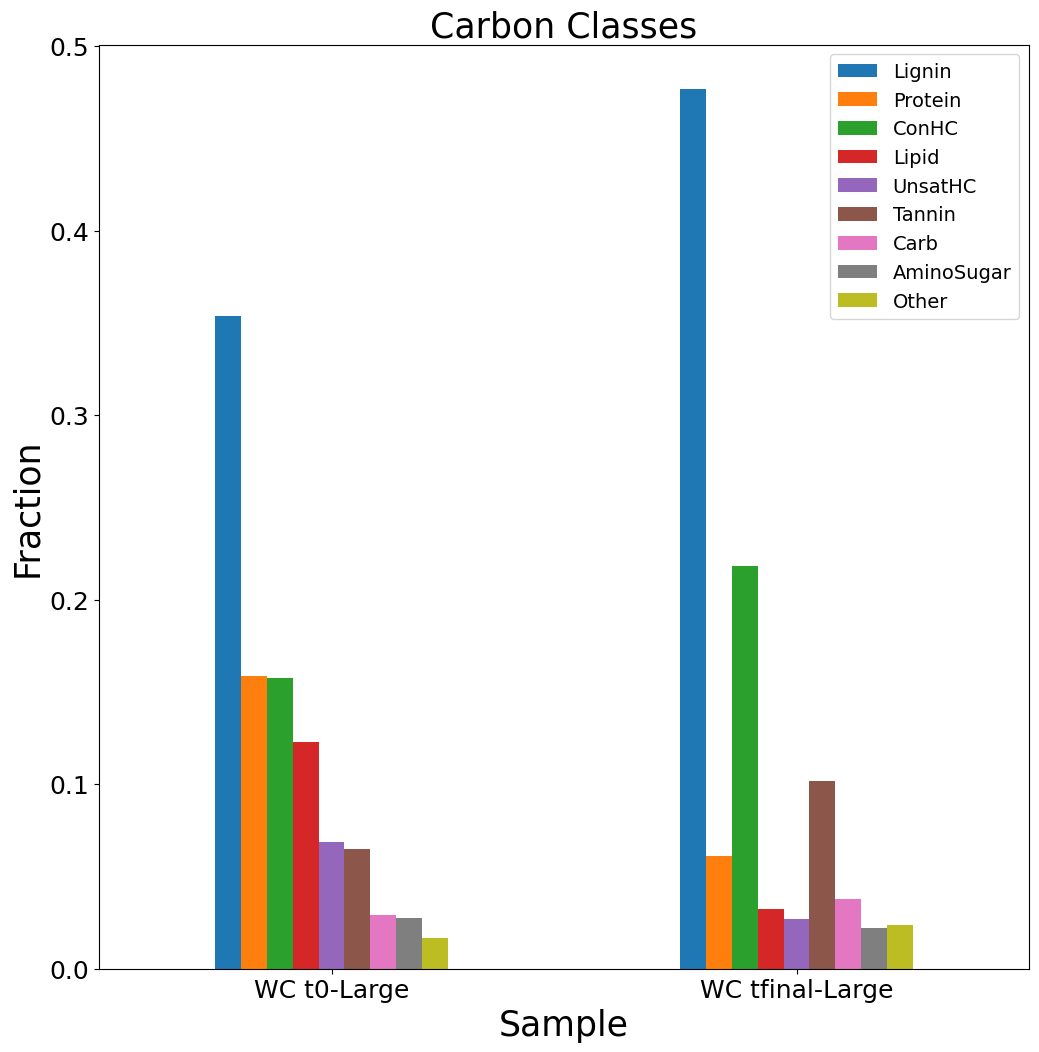

In [37]:
#plt.rcParams.update({'font.size': 12})
#plt.rc('axes', labelsize = 12)
#x = [ 1, 2,3,4,5,6,7,8,9,10]

plt=out.plot.bar(rot=0, figsize = (12,12))
#plt.scatter(x,Carbon_SPS_0001)
plt.set_title('Carbon Classes', fontsize=25)
plt.set_xlabel('Sample',fontsize=25)
plt.set_ylabel('Fraction', fontsize=25)
plt.legend(loc=1, fontsize =14)